In [11]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from scipy.ndimage import convolve1d
from scipy.signal import firwin, welch
from skimage import io

In [12]:
image = io.imread('https://drive.google.com/uc?id=1LQjlCdKY1mnQFva0yLJIXv1XeQGrs81Y')

In [13]:
def artifact_filter(image, artifact_frequency, taps, epsilon, print_params=False):
  image = np.asarray(image, float)
  #First perform highpass vertically, then lowpass horizontally and remove filtered signal from original image
  return image - lowpass(highpass(image, artifact_frequency, taps, epsilon, print_params), artifact_frequency, taps, epsilon, print_params)


def highpass(image, distortion_freq, taps, epsilon, print_params=False):
  highpass_filter = firwin(taps, distortion_freq - epsilon,
               pass_zero='highpass', fs=1)
  if print_params:
    print("Highpass FIR Parameters:")
    print(highpass_filter)
  return convolve1d(image, highpass_filter, axis=0)

def lowpass(image, distortion_freq, taps, epsilon, print_params=False):
  lowpass_filter = firwin(taps, epsilon, pass_zero='lowpass', fs=1)
  if print_params:
    print("Lowpass FIR Parameters:")
    print(lowpass_filter)
  return convolve1d(image, lowpass_filter, axis=1)

In [14]:
artifact_frequency = 0.25 # Line artifacts are at every 4th line -> 0.25 frequency
epsilon = 0.04
taps = 33

In [15]:
image_filtered = artifact_filter(image, artifact_frequency, taps, epsilon, print_params=True)

Highpass FIR Parameters:
[-0.00122687 -0.00152587  0.0009631   0.00382838  0.00071422 -0.00765637
 -0.00681285  0.01015542  0.01944999 -0.00536835 -0.03792929 -0.01565801
  0.05816374  0.07138264 -0.07402277 -0.30572514  0.5802669  -0.30572514
 -0.07402277  0.07138264  0.05816374 -0.01565801 -0.03792929 -0.00536835
  0.01944999  0.01015542 -0.00681285 -0.00765637  0.00071422  0.00382838
  0.0009631  -0.00152587 -0.00122687]
Lowpass FIR Parameters:
[-0.0013038  -0.00117813 -0.00102349 -0.00051396  0.000759    0.00322145
  0.00724004  0.01304552  0.02066957  0.02990645  0.04030759  0.0512121
  0.06181081  0.07123596  0.07866427  0.08341891  0.08505541  0.08341891
  0.07866427  0.07123596  0.06181081  0.0512121   0.04030759  0.02990645
  0.02066957  0.01304552  0.00724004  0.00322145  0.000759   -0.00051396
 -0.00102349 -0.00117813 -0.0013038 ]


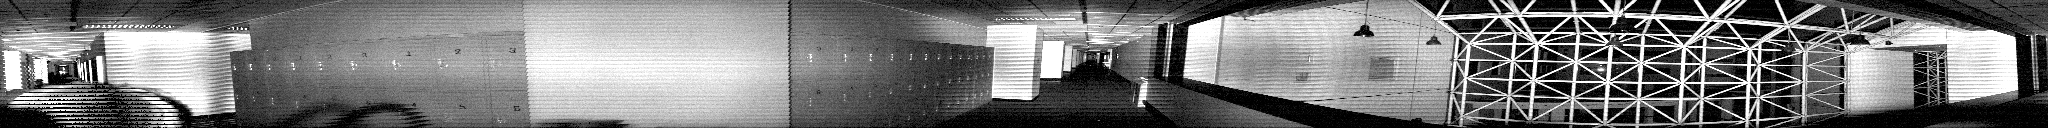

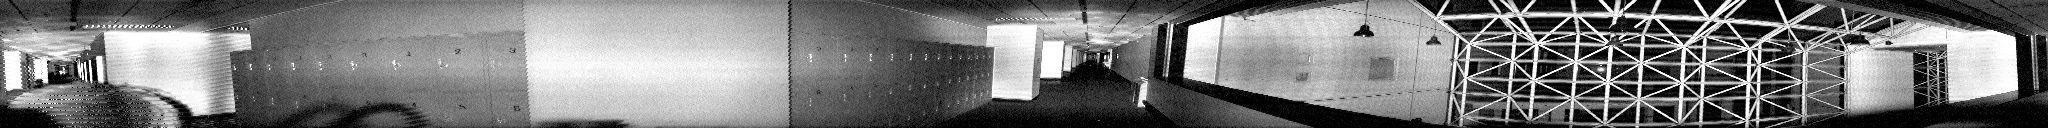

In [16]:
cv2_imshow(image)
cv2_imshow(image_filtered)